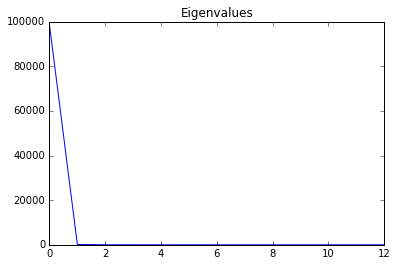

In [1]:
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression as PLS
import numpy as np
%matplotlib inline

df = pd.read_csv("wine.data.txt", sep=",", skipinitialspace=True, skiprows=0, header=None).as_matrix()
x = df[:,1:]
Y = df[:,0]
covr = np.cov(x.T,bias=1)
w,v = np.linalg.eig(covr)
idx = w.argsort()[::-1]
w = w[idx]
v = v[:,idx]
# eigenvalue plot
plt.plot(np.arange(len(w)),w)
plt.title("Eigenvalues")
plt.show()

[ -1.65926472e-03   6.81015556e-04  -1.94905742e-04   4.67130058e-03
  -1.78680075e-02  -9.89829680e-04  -1.56728830e-03   1.23086662e-04
  -6.00607792e-04  -2.32714319e-03  -1.71380037e-04  -7.04931645e-04
  -9.99822937e-01]


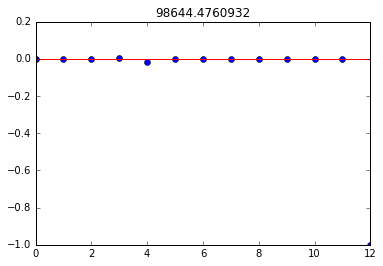

[ -1.20340617e-03  -2.15498184e-03  -4.59369254e-03  -2.64503930e-02
  -9.99344186e-01  -8.77962152e-04   5.18507284e-05   1.35447892e-03
  -5.00440040e-03  -1.51003530e-02   7.62673115e-04   3.49536431e-03
   1.77738095e-02]


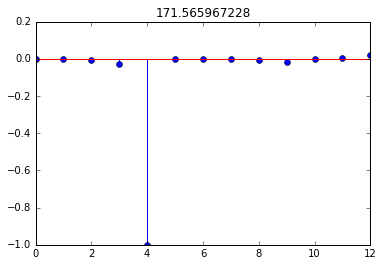

[ 0.01687381  0.12200337  0.05198743  0.938593   -0.02978025 -0.04048464
 -0.08544334  0.01351078 -0.02465938  0.29139846 -0.02597766 -0.07032397
  0.00452868]


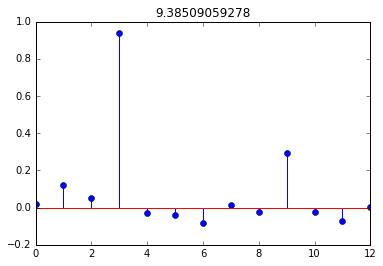

In [2]:
# first 3 pc
for i in range(3):
    eigenv = w[i]
    y = v[:,i]
    print y
    x = np.arange(len(y))
    plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.title(eigenv)
    plt.show()

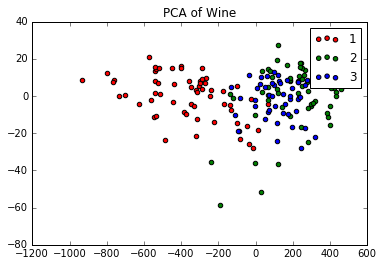

In [3]:
x = df[:,1:]
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)
target_names = [1,2,3]
for c, i, target_name in zip("rgb", target_names, target_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of Wine')
plt.show()